In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 50)

In [3]:
from sklearn.neighbors import RadiusNeighborsRegressor

### WE Model for data till 2017

In [4]:
df = pd.read_csv("data/df_kaggleAllIpl_preprocessed.csv")
del df['Unnamed: 0']

In [5]:
df = pd.read_csv("data/df_kaggleAllIpl_preprocessed.csv")

df = df.append(pd.read_csv("data/df_ipl2018_preprocessed_allMatches.csv"))
df = df.append(pd.read_csv("data/df_bbl2018_preprocessed_allMatches.csv"))
df = df.append(pd.read_csv("data/df_blast2018_preprocessed_allMatches.csv"))
df = df.append(pd.read_csv("data/df_cpl2018_preprocessed_allMatches.csv"))
df = df.append(pd.read_csv("data/df_bpl2018_preprocessed_allMatches.csv"))
df = df.append(pd.read_csv("data/df_psl2018_preprocessed_allMatches.csv"))
del df["Unnamed: 0"]
df = df[df["total_runs"]!="wides"]
df["total_runs"] = df["total_runs"].astype(int)
df

/Users/nesara/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [6]:
### Ignore tie and DL results
dff = df[ (df['result']=="normal") & (df['dl_applied']==0) ].copy()

### First innings
df1 = dff[dff["inning"]==1].copy()
df1["teamChaseWin"] = df1["bowling_team"]==df1["winner"]
df1["teamChaseWin"] = df1["teamChaseWin"].astype(int)

df1["numRuns"] = df1.groupby(["match_id","inning"]).cumsum()["total_runs"]

df1["ballNum"] = (df1["over"]-1)*6+df1["ball"]
#df1["ballNum"][df1['ballNum'] >= 120] = 120
df1.loc[df1["ballNum"]>=120, "ballNum"] = 120
df1["ballsLeft"] = 240 - df1["ballNum"]
df1["pctBallsLeft"] = df1["ballsLeft"]/240

df1["isWicket"] = (~pd.isnull(df1["player_dismissed"])).astype(int)
df1["numWickets"] = df1.groupby(["match_id","inning"]).cumsum()["isWicket"]
df1["pctWicketsLeft"] = (10-df1["numWickets"])/10
df1["runRate"] = df1["numRuns"]/df1["ballNum"]*6

### Second innings
df2 = dff[dff["inning"]==2].copy()
df2["teamChaseWin"] = df2["batting_team"]==df2["winner"]
df2["teamChaseWin"] = df2["teamChaseWin"].astype(int)

df2["ballNum"] = (df2["over"]-1)*6+df2["ball"]
#df2["ballNum"][df2['ballNum'] >= 120] = 120
df2.loc[df2["ballNum"]>=120, "ballNum"] = 120
df2["ballsLeft"] = 120 - df2["ballNum"]
df2["pctBallsLeft"] = df2["ballsLeft"]/120

df2["isWicket"] = (~pd.isnull(df2["player_dismissed"])).astype(int)
df2["numWickets"] = df2.groupby(["match_id","inning"]).cumsum()["isWicket"]
df2["pctWicketsLeft"] = (10-df2["numWickets"])/10

tmp = df1.groupby(["match_id"]).sum()["total_runs"].reset_index()
tmp['total_runs'] = tmp['total_runs']+1
tmp.rename(columns={'total_runs':'target'}, inplace=True)
df2 = df2.set_index('match_id').join(tmp.set_index('match_id')).reset_index()
df2["numRuns"] = df2.groupby(["match_id","inning"]).cumsum()["total_runs"]

df2["runsLeft"] = df2["target"]-df2["numRuns"]
df2["requiredRunRate"] = df2["runsLeft"]/df2["ballsLeft"]*6
#df2["requiredRunRate"][df2["requiredRunRate"]<=0] = 0
df2.loc[df2["requiredRunRate"]<=0, "requiredRunRate"] = 0
df2 = df2[df2["ballsLeft"]>=1]


In [7]:
neigh1 = RadiusNeighborsRegressor(radius=3.0, weights='uniform',algorithm='auto', leaf_size=30, p=2, metric='minkowski')
y = df1[["teamChaseWin"]]
#X = df1[["numRuns","numWickets","ballsLeft","pctBallsLeft","pctWicketsLeft"]]
X = df1[["runRate","numWickets","ballsLeft","pctBallsLeft","pctWicketsLeft"]]
#X = df1[["runRate","pctBallsLeft","pctWicketsLeft"]]
inn1Model = neigh1.fit(X, y)

neigh2 = RadiusNeighborsRegressor(radius=3.0, weights='uniform',algorithm='auto', leaf_size=30, p=2, metric='minkowski')
y = df2[["teamChaseWin"]]
#X = df2[["runsLeft","numWickets","ballsLeft","pctBallsLeft","pctWicketsLeft"]]
#X = df2[["requiredRunRate","pctBallsLeft","pctWicketsLeft"]]
X = df2[["requiredRunRate","numWickets","ballsLeft","pctBallsLeft","pctWicketsLeft"]]
inn2Model = neigh2.fit(X, y)


### Loading IPL 2018 dataframe

In [8]:
df = pd.read_csv("data/df_ipl2018_preprocessed_allMatches.csv")
del df['Unnamed: 0']
df.head(2)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,637,2018,Mumbai,NaN,Mumbai Indians,Chennai Super Kings,NaN,NaN,normal,0,Chennai Super Kings,0,1,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Chennai Super Kings,1,1,Rohit,NaN,Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,637,2018,Mumbai,NaN,Mumbai Indians,Chennai Super Kings,NaN,NaN,normal,0,Chennai Super Kings,0,1,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Chennai Super Kings,1,2,Rohit,NaN,Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [9]:
### Ignore tie and DL results
dff = df[ (df['result']=="normal") & (df['dl_applied']==0) ].copy()

### First innings
df1 = dff[dff["inning"]==1].copy()
df1["teamChaseWin"] = df1["bowling_team"]==df1["winner"]
df1["teamChaseWin"] = df1["teamChaseWin"].astype(int)

df1["numRuns"] = df1.groupby(["match_id","inning"]).cumsum()["total_runs"]

df1["ballNum"] = (df1["over"]-1)*6+df1["ball"]
#df1["ballNum"][df1['ballNum'] >= 120] = 120
df1.loc[df1["ballNum"]>=120, "ballNum"] = 120
df1["ballsLeft"] = 240 - df1["ballNum"]
df1["pctBallsLeft"] = df1["ballsLeft"]/240

df1["isWicket"] = (~pd.isnull(df1["player_dismissed"])).astype(int)
df1["numWickets"] = df1.groupby(["match_id","inning"]).cumsum()["isWicket"]
df1["pctWicketsLeft"] = (10-df1["numWickets"])/10
df1["runRate"] = df1["numRuns"]/df1["ballNum"]*6

### Second innings
df2 = dff[dff["inning"]==2].copy()
df2["teamChaseWin"] = df2["batting_team"]==df2["winner"]
df2["teamChaseWin"] = df2["teamChaseWin"].astype(int)


df2["ballNum"] = (df2["over"]-1)*6+df2["ball"]
#df2["ballNum"][df2['ballNum'] >= 120] = 120
df2.loc[df2["ballNum"]>=120, "ballNum"] = 120
df2["ballsLeft"] = 120 - df2["ballNum"]
df2["pctBallsLeft"] = df2["ballsLeft"]/120

df2["isWicket"] = (~pd.isnull(df2["player_dismissed"])).astype(int)
df2["numWickets"] = df2.groupby(["match_id","inning"]).cumsum()["isWicket"]
df2["pctWicketsLeft"] = (10-df2["numWickets"])/10

tmp = df1.groupby(["match_id"]).sum()["total_runs"].reset_index()
tmp['total_runs'] = tmp['total_runs']+1
tmp.rename(columns={'total_runs':'target'}, inplace=True)
df2 = df2.set_index('match_id').join(tmp.set_index('match_id')).reset_index()
df2["numRuns"] = df2.groupby(["match_id","inning"]).cumsum()["total_runs"]

df2["runsLeft"] = df2["target"]-df2["numRuns"]
df2["requiredRunRate"] = df2["runsLeft"]/df2["ballsLeft"]*6
#df2["requiredRunRate"][df2["requiredRunRate"]<=0] = 0
df2.loc[df2["requiredRunRate"]<=0, "requiredRunRate"] = 0
df2 = df2[df2["ballsLeft"]>=1]

In [166]:
dfw = pd.DataFrame()
#df = df[df["match_id"]==650]

for m in [695]: #df['match_id'].unique():
    bat_wpa = {}
    bat_wpa_acc = {}
    bowl_wpa = {}
    bowl_wpa_acc = {}
    bat_balls_impacted = {}
    bowl_balls_impacted = {}
    field_wpa = {}
    
    if m%10==0:
        print(m)
        
    dfm = df[df['match_id']==m]

    if dfm['result'].unique()[0]=="normal" and dfm['dl_applied'].unique()[0]==0: ### Ignore ties and matches with DL method
        
        ### First innings
        dfm1 = df1[df1["match_id"]==m]
        #X = dfm1[["total_runs","numWickets","ballsLeft","pctBallsLeft","pctWicketsLeft"]]
        X = dfm1[["runRate","numWickets","ballsLeft","pctBallsLeft","pctWicketsLeft"]]
        #X = dfm1[["runRate","pctBallsLeft","pctWicketsLeft"]]
        teamChaseWin = dfm1["teamChaseWin"].unique()[0]
        we1 = inn1Model.predict(X)

        
        for b in range(len(dfm1)):  ### Ball by ball for first innings
            if b!=0 and b>=2:
                deltaWe1 = we1[b] - we1[b-1]
                
                if deltaWe1<0:
                    batsman = dfm1.iloc[b]["batsman"]
                    if batsman in bat_wpa:
                        bat_wpa[batsman] += abs(deltaWe1/2)
                        #bat_wpa[batsman] += 1.25*abs(deltaWe1/2)
                        bat_wpa_acc[batsman].append(abs(deltaWe1/2))
                        bat_balls_impacted[batsman].append(b)
                    else:
                        bat_wpa[batsman] = abs(deltaWe1/2)
                        bat_wpa_acc[batsman] = []
                        bat_wpa_acc[batsman].append(abs(deltaWe1/2))
                        bat_balls_impacted[batsman] = []
                        bat_balls_impacted[batsman].append(b)
                    
                    bowler = dfm1.iloc[b]["bowler"]
                    if bowler in bowl_wpa:
                        bowl_wpa[bowler] -= abs(deltaWe1/2)
                        #bowl_wpa[bowler] -= 1.25*abs(deltaWe1/2)
                        bowl_wpa_acc[bowler].append(-abs(deltaWe1/2))
                        bowl_balls_impacted[bowler].append(b)
                    else:
                        bowl_wpa[bowler] = -abs(deltaWe1/2)
                        bowl_wpa_acc[bowler] = []
                        bowl_wpa_acc[bowler].append(-abs(deltaWe1/2))
                        bowl_balls_impacted[bowler] = []
                        bowl_balls_impacted[bowler].append(b)
                        
                    
                else:
                    
                    if (not pd.isnull(dfm1.iloc[b]["player_dismissed"])) and (dfm1.iloc[b]["dismissal_kind"]=="run out"):   
                        fielder = dfm1.iloc[b]["fielder"]
                        if fielder in field_wpa:
                            field_wpa[fielder] += abs(deltaWe1/2)
                        else:
                            field_wpa[fielder] = abs(deltaWe1/2)
                        
                        dismissedBatsman = dfm1.iloc[b]["player_dismissed"]
                        if dismissedBatsman in bat_wpa:
                            bat_wpa[dismissedBatsman] -= abs(deltaWe1/2)
                            bat_wpa_acc[dismissedBatsman].append(-abs(deltaWe1/2))
                            bat_balls_impacted[dismissedBatsman].append(b)
                        else:
                            bat_wpa[dismissedBatsman] = -abs(deltaWe1/2)
                            bat_wpa_acc[dismissedBatsman] = []
                            bat_wpa_acc[dismissedBatsman].append(-abs(deltaWe1/2))
                            bat_balls_impacted[dismissedBatsman] = []
                            bat_balls_impacted[dismissedBatsman].append(b)
                    else:  
                        bowler = dfm1.iloc[b]["bowler"]
                        if bowler in bowl_wpa:
                            bowl_wpa[bowler] += abs(deltaWe1/2)
                            #bowl_wpa[bowler] += 0.85*abs(deltaWe1/2)
                            bowl_wpa_acc[bowler].append(abs(deltaWe1/2))
                            bowl_balls_impacted[bowler].append(b)
                        else:
                            bowl_wpa[bowler] = abs(deltaWe1/2)
                            bowl_wpa_acc[bowler] = []
                            bowl_wpa_acc[bowler].append(abs(deltaWe1/2))
                            bowl_balls_impacted[bowler] = []
                            bowl_balls_impacted[bowler].append(b)
                        
                        batsman = dfm1.iloc[b]["batsman"]
                        if batsman in bat_wpa:
                            bat_wpa[batsman] -= abs(deltaWe1/2)
                            #bat_wpa[batsman] -= 0.85*abs(deltaWe1/2)
                            bat_wpa_acc[batsman].append(-abs(deltaWe1/2))
                            bat_balls_impacted[batsman].append(b)
                        else:
                            bat_wpa[batsman] = -abs(deltaWe1/2)
                            bat_wpa_acc[batsman] = []
                            bat_wpa_acc[batsman].append(-abs(deltaWe1/2))
                            bat_balls_impacted[batsman] = []
                            bat_balls_impacted[batsman].append(b)
                            
        
        ### Second innings
        dfm2 = df2[df2["match_id"]==m]
        #X = dfm2[["total_runs","numWickets","ballsLeft","pctBallsLeft","pctWicketsLeft"]]
        X = dfm2[["requiredRunRate","numWickets","ballsLeft","pctBallsLeft","pctWicketsLeft"]]
        #X = dfm2[["requiredRunRate","pctBallsLeft","pctWicketsLeft"]]
        we2 = inn2Model.predict(X)

        num_balls_first_innings = len(dfm1)
        
        for b in range(len(dfm2)):  ### Ball by ball for first innings
            if b!=0 and b>=2: 
                deltaWe2 = we2[b] - we2[b-1]
                
                if deltaWe2>0:
                    batsman = dfm2.iloc[b]["batsman"]
                    if batsman in bat_wpa:
                        bat_wpa[batsman] += abs(deltaWe2/2)
                        bat_wpa_acc[batsman].append(abs(deltaWe2/2))

                        bat_balls_impacted[batsman].append(num_balls_first_innings+b)
                    else:
                        bat_wpa[batsman] = abs(deltaWe2/2)
                        bat_wpa_acc[batsman] = []
                        bat_wpa_acc[batsman].append(abs(deltaWe2/2))
                        bat_balls_impacted[batsman] = []
                        bat_balls_impacted[batsman].append(num_balls_first_innings+b)
                    
                    bowler = dfm2.iloc[b]["bowler"]
                    if bowler in bowl_wpa:
                        bowl_wpa[bowler] -= abs(deltaWe2/2)
                        bowl_wpa_acc[bowler].append(-abs(deltaWe2/2))
                        bowl_balls_impacted[bowler].append(num_balls_first_innings+b)
                    else:
                        bowl_wpa[bowler] = -abs(deltaWe2/2)
                        bowl_wpa_acc[bowler] = []
                        bowl_wpa_acc[bowler].append(-abs(deltaWe2/2))
                        bowl_balls_impacted[bowler] = []
                        bowl_balls_impacted[bowler].append(num_balls_first_innings+b)
                else:
                    
                    if (not pd.isnull(dfm2.iloc[b]["player_dismissed"])) and (dfm2.iloc[b]["dismissal_kind"]=="run out"):   
                        fielder = dfm2.iloc[b]["fielder"]
                        if fielder in field_wpa:
                            field_wpa[fielder] += abs(deltaWe2/2)
                        else:
                            field_wpa[fielder] = abs(deltaWe2/2)
                        
                        dismissedBatsman = dfm2.iloc[b]["player_dismissed"]
                        if dismissedBatsman in bat_wpa:
                            bat_wpa[dismissedBatsman] -= abs(deltaWe2/2)
                            bat_wpa_acc[dismissedBatsman].append(-abs(deltaWe2/2))
                            bat_balls_impacted[dismissedBatsman].append(num_balls_first_innings+b)
                        else:
                            bat_wpa[dismissedBatsman] = -abs(deltaWe2/2)
                            bat_wpa_acc[dismissedBatsman] = []
                            bat_wpa_acc[dismissedBatsman].append(-abs(deltaWe2/2))
                            bat_balls_impacted[dismissedBatsman] = []
                            bat_balls_impacted[dismissedBatsman].append(num_balls_first_innings+b)
                    else:
                        bowler = dfm2.iloc[b]["bowler"]
                        if bowler in bowl_wpa:
                            bowl_wpa[bowler] += abs(deltaWe2/2)
                            bowl_wpa_acc[bowler].append(abs(deltaWe2/2))
                            bowl_balls_impacted[bowler].append(num_balls_first_innings+b)
                        else:
                            bowl_wpa[bowler] = abs(deltaWe2/2)
                            bowl_wpa_acc[bowler] = []
                            bowl_wpa_acc[bowler].append(abs(deltaWe2/2))
                            bowl_balls_impacted[bowler] = []
                            bowl_balls_impacted[bowler].append(num_balls_first_innings+b)

                        batsman = dfm2.iloc[b]["batsman"]
                        if batsman in bat_wpa:
                            bat_wpa[batsman] -= abs(deltaWe2/2)
                            bat_wpa_acc[batsman].append(-abs(deltaWe2/2))
                            bat_balls_impacted[batsman].append(num_balls_first_innings+b)
                        else:
                            bat_wpa[batsman] = -abs(deltaWe2/2)
                            bat_wpa_acc[batsman] = []
                            bat_wpa_acc[batsman].append(-abs(deltaWe2/2))
                            bat_balls_impacted[batsman] = []
                            bat_balls_impacted[batsman].append(num_balls_first_innings+b)
    
    # Subtract maximum value
    """
    for p in bat_wpa:
        bat_wpa[p] = bat_wpa[p] - max(bat_wpa_acc[p])
        
    for p in bowl_wpa:
        bowl_wpa[p] = bowl_wpa[p] - max(bowl_wpa_acc[p])
    """
    
    ### Bat wpa
    dfbatwpa = pd.DataFrame.from_dict(bat_wpa, orient='index').reset_index()
    dfbatwpa.rename(columns={'index':'player',0:'bat_wpa'}, inplace=True)
    dfbatwpa["match_id"] = dfm["match_id"].unique()[0]
    dfbatwpa["season"]   = dfm["season"].unique()[0]
    dft1 = dfbatwpa.set_index(['player']).join(dfm.set_index(['batsman']),rsuffix='1')["batting_team"].reset_index().drop_duplicates()
    dft1.dropna(inplace=True)
    dft1.rename(columns={'index':'player','batting_team':'team'}, inplace=True)
    dfbatwpa = dfbatwpa.set_index('player').join(dft1.set_index('player')).reset_index()

    ### Bowl wpa
    dfbowlwpa = pd.DataFrame.from_dict(bowl_wpa, orient='index').reset_index()
    dfbowlwpa.rename(columns={'index':'player',0:'bowl_wpa'}, inplace=True)
    dfbowlwpa["match_id"] = dfm["match_id"].unique()[0]
    dfbowlwpa["season"]   = dfm["season"].unique()[0]
    dft2 = dfbowlwpa.set_index(['player']).join(dfm.set_index(['bowler']),rsuffix='1')["bowling_team"].reset_index().drop_duplicates()
    dft2.dropna(inplace=True)
    dft2.rename(columns={'index':'player','bowling_team':'team'}, inplace=True)
    dfbowlwpa = dfbowlwpa.set_index('player').join(dft2.set_index('player')).reset_index()

    dfwpa = dfbatwpa.set_index(['player','match_id','season','team']).join(dfbowlwpa.set_index(['player','match_id','season','team']),how='outer').reset_index()
    dfw = dfw.append(dfwpa)
                

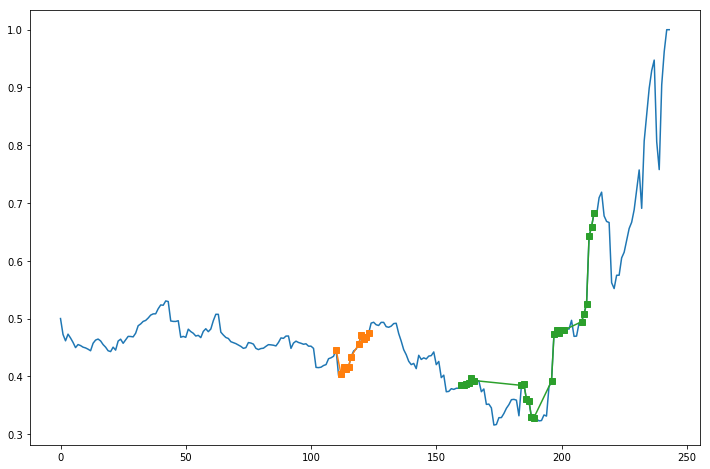

In [167]:
#player = "de Villiers"
player = "Rashid Khan"

we = []
is_bat_first = 1
we = we1.tolist() + we2.tolist()
we = [item for sublist in we for item in sublist]
we[0] = 0.5
#balls_impacted = bat_balls_impacted[player] + bowl_balls_impacted[player]

for i in range(len(we)):
    if is_bat_first==1:
        we[i] = 1 - we[i]
        
plt.figure(figsize=(12,8))
plt.plot(we)

player_impact = []
for i in bat_balls_impacted[player]:
    player_impact.append(we[i])
balls_impacted = bat_balls_impacted[player] 
plt.plot(balls_impacted, player_impact, 's-')    

#"""
player_impact = []
for i in bowl_balls_impacted[player]:
    player_impact.append(we[i])
balls_impacted = bowl_balls_impacted[player]
plt.plot(balls_impacted, player_impact, 's-')
#"""

### Save match win expectancy and balls impacted by the player for illustrating X-factor

In [134]:
import json
match_id = m
dfj = {}
dfj["we"] = we
dfj["bat_impact"] = bat_balls_impacted[player]
dfj["bowl_impact"] = []

with open("code/data/xfactor/m"+str(match_id)+"_"+player+".json", "w") as f:
    json.dump(dfj, f)

In [168]:
dfj = pd.DataFrame()
dfj["we"] = we
dfj["bat_impact"] = 0
dfj["bowl_impact"] = 0

for b in range(len(we)):
    if b in bat_balls_impacted[player]:
        dfj.at[b, "bat_impact"] = 1
        
#"""
for b in range(len(we)):
    if b in bowl_balls_impacted[player]:
        dfj.at[b, "bowl_impact"] = 1
#"""

dfj.reset_index(inplace=True)
dfj.rename(columns={"index":"ball_id"}, inplace=True)
dfj["we"] = np.round(dfj["we"],2)
dfj.to_csv("code/data/xfactor/m"+str(match_id)+"_"+player+".csv", index=False)
dfj

,ball_id,we,bat_impact,bowl_impact
0,0,0.50,0,0
1,1,0.47,0,0
2,2,0.46,0,0
3,3,0.47,0,0
4,4,0.47,0,0
5,5,0.46,0,0
6,6,0.45,0,0
7,7,0.45,0,0
8,8,0.45,0,0
9,9,0.45,0,0


In [170]:
len(dfm1)

124

In [171]:
len(we)

244

### Per match per player WPA

In [121]:
dfmp = dfw.copy()
dfmp.fillna(0, inplace=True)
dfmp["overall_wpa"] = dfmp["bat_wpa"] + dfmp["bowl_wpa"]
dfmp.sort_values("overall_wpa", ascending=False)

,bat_wpa,bowl_wpa,match_id,player,season,team,overall_wpa
3,0.477262,0.004131,657.0,Gowtham,2018.0,Rajasthan Royals,0.481392
3,0.336454,-0.002049,637.0,Dwayne Bravo,2018.0,Chennai Super Kings,0.334405
0,0.002677,0.296903,675.0,Bhuvneshwar,2018.0,Sunrisers Hyderabad,0.299580
20,0.285288,0.000000,658.0,Shreyas Iyer,2018.0,Delhi Daredevils,0.285288
15,-0.012845,0.297397,667.0,Southee,2018.0,Royal Challengers Bangalore,0.284553
3,0.000000,0.281849,686.0,Bumrah,2018.0,Mumbai Indians,0.281849
20,0.270636,0.000000,655.0,de Villiers,2018.0,Royal Challengers Bangalore,0.270636
17,0.263835,0.000000,696.0,Watson,2018.0,Chennai Super Kings,0.263835
14,0.259751,-0.007377,693.0,SN Thakur,2018.0,Chennai Super Kings,0.252374
21,0.192919,0.058526,653.0,Watson,2018.0,Chennai Super Kings,0.251445


### Per season per player WPA

In [107]:
dfpwpa = dfw[["player","season", "team", "match_id", "bat_wpa", "bowl_wpa"]].copy()
values = {'bat_wpa': 0, 'bowl_wpa': 0}
dfpwpa.fillna(value=values, inplace=True)
dfpwpa["overall_wpa"] = dfpwpa["bat_wpa"] + dfpwpa["bowl_wpa"]
dfpwpa = dfpwpa.groupby(["player","season","team"]).sum().reset_index()
del dfpwpa["match_id"]
dfpwpa.head()

,player,season,team,bat_wpa,bowl_wpa,overall_wpa
0,A Russell,2018.0,Kolkata Knight Riders,0.047428,-0.028979,0.018449
1,Abhishek Sharma,2018.0,Delhi Daredevils,0.023607,0.000000,0.023607
2,Akshdeep Nath,2018.0,Kings XI Punjab,-0.049285,0.000000,-0.049285
3,Andrew Tye,2018.0,Kings XI Punjab,-0.062283,-0.042698,-0.104980
4,Ankit Sharma,2018.0,Rajasthan Royals,0.000000,-0.013975,-0.013975


In [180]:
dftx = dfpwpa.groupby("team").sum()[["bat_wpa", "bowl_wpa","overall_wpa"]].reset_index()
dftx.sort_values("overall_wpa", ascending=False, inplace=True)
dftx = dftx[["team", "bat_wpa", "bowl_wpa"]]
dftx[["bat_wpa", "bowl_wpa"]] = np.round(dftx[["bat_wpa", "bowl_wpa"]],2)
dftx.to_csv("code/data/xfactor/team_xfactor.csv", index=False)
dftx

,team,bat_wpa,bowl_wpa
0,Chennai Super Kings,1.37,0.06
3,Kolkata Knight Riders,0.79,0.28
7,Sunrisers Hyderabad,-0.05,0.29
1,Delhi Daredevils,0.43,-0.65
6,Royal Challengers Bangalore,-0.11,-0.44
4,Mumbai Indians,-0.42,-0.18
5,Rajasthan Royals,-0.29,-0.34
2,Kings XI Punjab,-0.76,-0.65


In [109]:
dfpwpa.sort_values("overall_wpa", ascending=False)

,player,season,team,bat_wpa,bowl_wpa,overall_wpa
149,de Villiers,2018.0,Royal Challengers Bangalore,0.717886,0.000000,0.717886
56,Karthik,2018.0,Kolkata Knight Riders,0.479790,0.000000,0.479790
141,Watson,2018.0,Chennai Super Kings,0.532951,-0.089418,0.443533
100,Rahul,2018.0,Kings XI Punjab,0.430558,0.000000,0.430558
104,Rashid Khan,2018.0,Sunrisers Hyderabad,0.024511,0.401433,0.425944
33,Dhawan,2018.0,Sunrisers Hyderabad,0.398743,0.000000,0.398743
89,Narine,2018.0,Kolkata Knight Riders,0.187735,0.190831,0.378566
145,Y Pathan,2018.0,Sunrisers Hyderabad,0.375602,0.002191,0.377793
19,Buttler,2018.0,Rajasthan Royals,0.334574,0.000000,0.334574
41,Gowtham,2018.0,Rajasthan Royals,0.324715,0.005316,0.330031


In [125]:
dfpwpa = dfw[["player","season", "team", "match_id", "bat_wpa", "bowl_wpa"]].copy()
values = {'bat_wpa': 0, 'bowl_wpa': 0}
dfpwpa.fillna(value=values, inplace=True)
dfpwpa["overall_wpa"] = dfpwpa["bat_wpa"] + dfpwpa["bowl_wpa"]
#dfpwpa = dfpwpa.groupby(["player","season","team"]).sum().reset_index()
#del dfpwpa["match_id"]
dfpwpa[(dfpwpa["player"]=="Y Pathan")]

,player,season,team,match_id,bat_wpa,bowl_wpa,overall_wpa
21,Y Pathan,2018.0,Sunrisers Hyderabad,643.0,0.030560,0.000000,0.030560
21,Y Pathan,2018.0,Sunrisers Hyderabad,646.0,0.110237,0.000000,0.110237
20,Y Pathan,2018.0,Sunrisers Hyderabad,652.0,-0.026243,0.000000,-0.026243
19,Y Pathan,2018.0,Sunrisers Hyderabad,656.0,0.050135,0.000000,0.050135
21,Y Pathan,2018.0,Sunrisers Hyderabad,659.0,0.012040,0.000000,0.012040
21,Y Pathan,2018.0,Sunrisers Hyderabad,661.0,0.015532,0.000000,0.015532
21,Y Pathan,2018.0,Sunrisers Hyderabad,664.0,-0.012632,0.002191,-0.010441
20,Y Pathan,2018.0,Sunrisers Hyderabad,672.0,0.212327,0.000000,0.212327
19,Y Pathan,2018.0,Sunrisers Hyderabad,675.0,-0.009363,0.000000,-0.009363
20,Y Pathan,2018.0,Sunrisers Hyderabad,690.0,-0.017690,0.000000,-0.017690


In [124]:
df[df["match_id"]==686]

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11579,686,2018,Mumbai,NaN,Mumbai Indians,Kings XI Punjab,NaN,NaN,normal,0,Mumbai Indians,3,0,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Kings XI Punjab,1,1,Suryakumar Yadav,NaN,Rajpoot,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
11580,686,2018,Mumbai,NaN,Mumbai Indians,Kings XI Punjab,NaN,NaN,normal,0,Mumbai Indians,3,0,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Kings XI Punjab,1,2,Lewis,Suryakumar Yadav,Rajpoot,0,1,0,0,0,0,0,0,1,NaN,NaN,NaN
11581,686,2018,Mumbai,NaN,Mumbai Indians,Kings XI Punjab,NaN,NaN,normal,0,Mumbai Indians,3,0,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Kings XI Punjab,1,2,Lewis,Suryakumar Yadav,Rajpoot,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
11582,686,2018,Mumbai,NaN,Mumbai Indians,Kings XI Punjab,NaN,NaN,normal,0,Mumbai Indians,3,0,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Kings XI Punjab,1,3,Suryakumar Yadav,Lewis,Rajpoot,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
11583,686,2018,Mumbai,NaN,Mumbai Indians,Kings XI Punjab,NaN,NaN,normal,0,Mumbai Indians,3,0,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Kings XI Punjab,1,4,Suryakumar Yadav,Lewis,Rajpoot,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
11584,686,2018,Mumbai,NaN,Mumbai Indians,Kings XI Punjab,NaN,NaN,normal,0,Mumbai Indians,3,0,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Kings XI Punjab,1,5,Suryakumar Yadav,Lewis,Rajpoot,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
11585,686,2018,Mumbai,NaN,Mumbai Indians,Kings XI Punjab,NaN,NaN,normal,0,Mumbai Indians,3,0,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Kings XI Punjab,1,6,Suryakumar Yadav,Lewis,Rajpoot,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
11586,686,2018,Mumbai,NaN,Mumbai Indians,Kings XI Punjab,NaN,NaN,normal,0,Mumbai Indians,3,0,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Kings XI Punjab,2,1,Lewis,Suryakumar Yadav,Mohit Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
11587,686,2018,Mumbai,NaN,Mumbai Indians,Kings XI Punjab,NaN,NaN,normal,0,Mumbai Indians,3,0,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Kings XI Punjab,2,2,Lewis,Suryakumar Yadav,Mohit Sharma,0,0,0,1,0,0,0,0,1,NaN,NaN,NaN
11588,686,2018,Mumbai,NaN,Mumbai Indians,Kings XI Punjab,NaN,NaN,normal,0,Mumbai Indians,3,0,NaN,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,1,Mumbai Indians,Kings XI Punjab,2,3,Suryakumar Yadav,Lewis,Mohit Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
